Initial model and vectorizer saved.

Model Accuracy : 0.95

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     14539
           1       0.36      0.97      0.53       461

    accuracy                           0.95     15000
   macro avg       0.68      0.96      0.75     15000
weighted avg       0.98      0.95      0.96     15000


Confusion Matrix:
[[13748   791]
 [   12   449]]


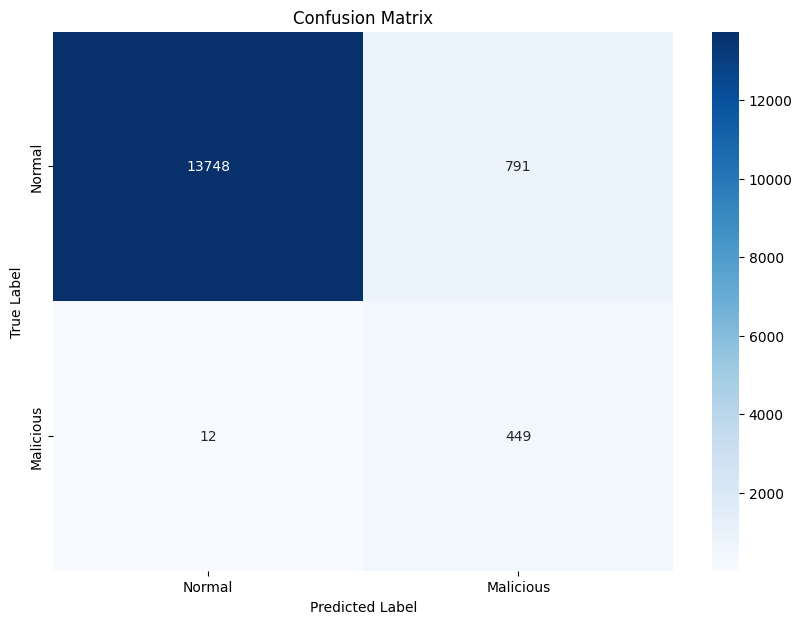

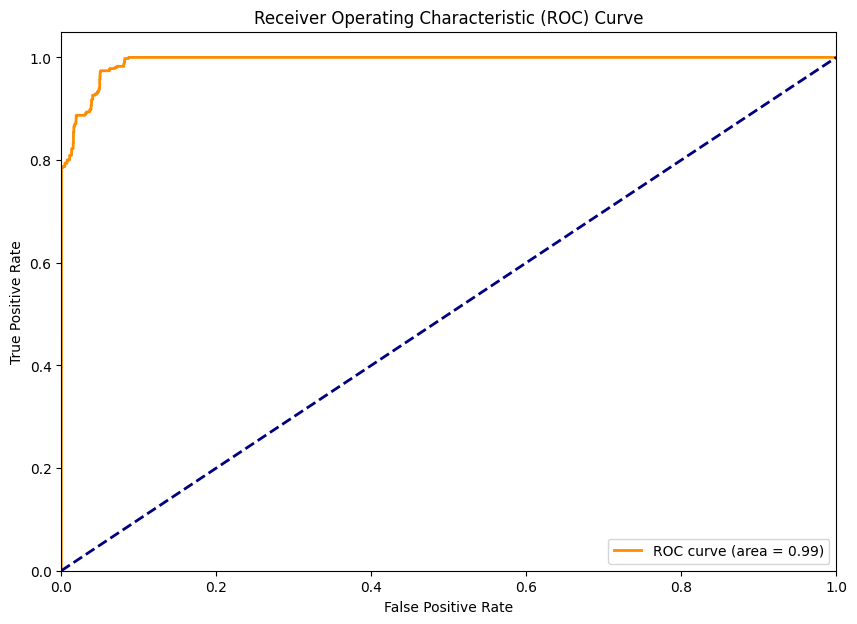

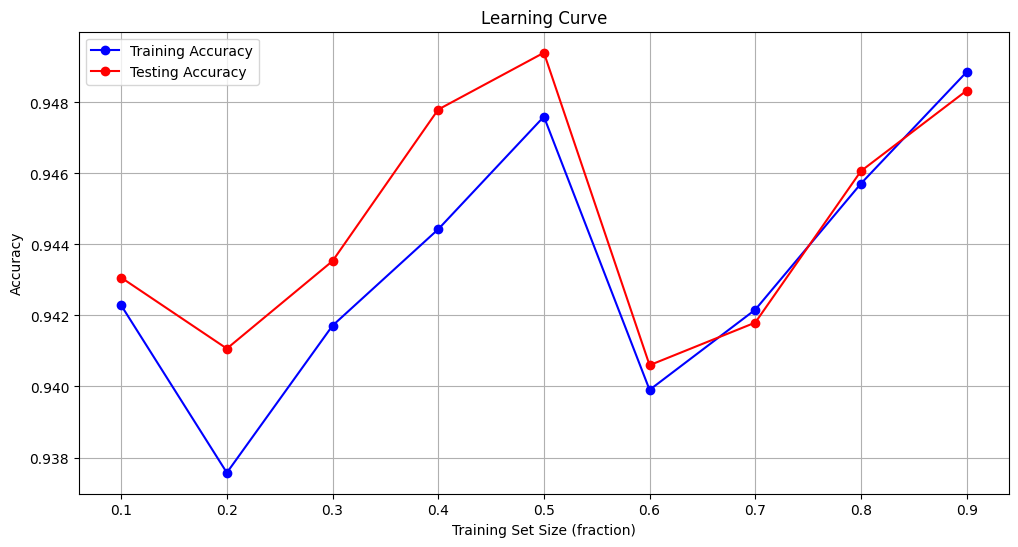

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from joblib import dump, load
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# Load the 50k dataset
dataset_50k = pd.read_csv(r'C:\Users\Srinivasan Rangasamy\Desktop\dataset generator\new\dataset_50k.csv')

# Combine relevant textual fields into a single 'text' field
text_columns = ['http_method', 'url_path', 'status_code', 'user_agent', 'content_type', 'referrer']

# Check if 'cookie' column exists and include it if available
if 'cookie' in dataset_50k.columns:
    text_columns.append('cookie')

# Preprocess the 50k dataset
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

dataset_50k['text'] = dataset_50k[text_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
dataset_50k['text'] = dataset_50k['text'].apply(preprocess_text)

# Vectorize the combined text using TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 1), max_df=0.85, min_df=0.02)
X_text_50k = vectorizer.fit_transform(dataset_50k['text'].fillna(''))
y_50k = dataset_50k['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_text_50k, y_50k, test_size=0.3, random_state=42)

# Initialize the Multinomial Naive Bayes model
model = MultinomialNB(alpha=1.0, class_prior=[0.5, 0.5])

# Train the model using the 50k dataset
model.fit(X_train, y_train)

# Save the initial model and vectorizer
dump(model, 'naive_bayes_model.pkl')
dump(vectorizer, 'tfidf_vectorizer.pkl')
print("Initial model and vectorizer saved.")

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\nModel Accuracy : {accuracy:.2f}")
print(f"\nClassification Report:\n{report}")
print(f"\nConfusion Matrix:\n{conf_matrix}")

# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Malicious'], yticklabels=['Normal', 'Malicious'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class (malicious)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot learning curve
train_sizes = np.linspace(0.1, 0.9, 9)  # Adjust train_sizes to be less than 1.0
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_train_partial, _, y_train_partial, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)
    model.fit(X_train_partial, y_train_partial)
    train_accuracy = accuracy_score(y_train_partial, model.predict(X_train_partial))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.plot(train_sizes, test_scores, marker='o', linestyle='-', color='r', label='Testing Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Set Size (fraction)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

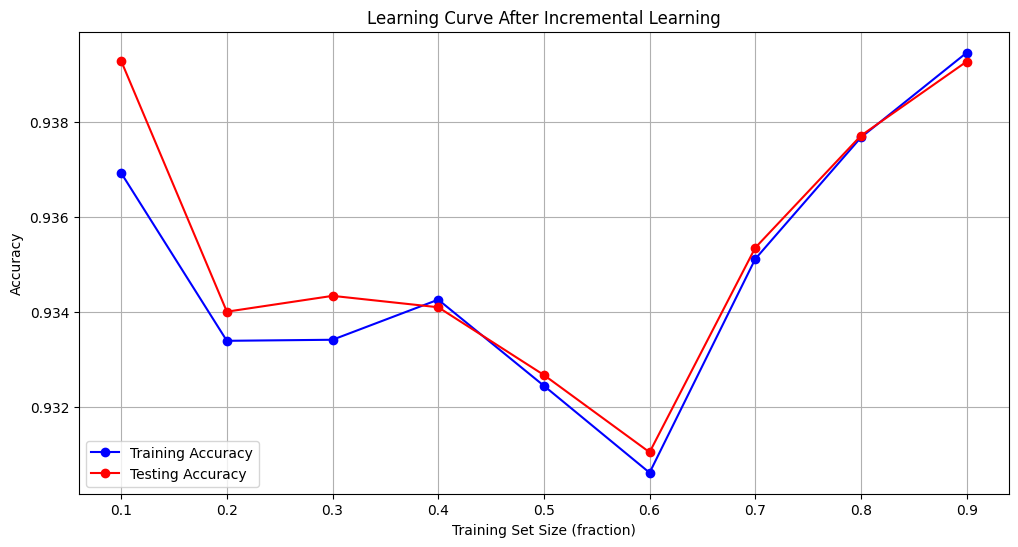

Model and vectorizer updated with 75k dataset and saved.


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from joblib import load, dump
import matplotlib.pyplot as plt
import numpy as np
import re

# Load the 75k dataset
dataset_75k = pd.read_csv(r'C:\Users\Srinivasan Rangasamy\Desktop\dataset generator\new\dataset_75k.csv') 

# Combine relevant textual fields into a single 'text' field
text_columns = ['http_method', 'url_path', 'status_code', 'user_agent', 'content_type', 'referrer']

# Check if 'cookie' column exists and include it if available
if 'cookie' in dataset_75k.columns:
    text_columns.append('cookie')

# Preprocess the 75k dataset
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

dataset_75k['text'] = dataset_75k[text_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
dataset_75k['text'] = dataset_75k['text'].apply(preprocess_text)

# Load the existing vectorizer and model from the initial training
vectorizer = load('tfidf_vectorizer.pkl')
model = load('naive_bayes_model.pkl')

# Transform the 75k dataset using the existing vectorizer
X_incremental_75k = vectorizer.transform(dataset_75k['text'].fillna(''))

# Select the target labels
y_incremental_75k = dataset_75k['label']

# Plot learning curve
train_sizes = np.linspace(0.1, 0.9, 9)  # Use a range of train sizes for plotting
train_scores = []
test_scores = []

for train_size in train_sizes:
    # Split the data according to the current train_size fraction
    idx = int(train_size * X_incremental_75k.shape[0])
    X_train_partial, y_train_partial = X_incremental_75k[:idx], y_incremental_75k[:idx]
    
    # Incremental learning: Update the model using the current portion of the 75k data
    model.partial_fit(X_train_partial, y_train_partial, classes=[0, 1])
    
    # Evaluate the model's performance
    train_accuracy = accuracy_score(y_train_partial, model.predict(X_train_partial))
    test_accuracy = accuracy_score(y_incremental_75k, model.predict(X_incremental_75k))
    
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.plot(train_sizes, test_scores, marker='o', linestyle='-', color='r', label='Testing Accuracy')
plt.title('Learning Curve After Incremental Learning')
plt.xlabel('Training Set Size (fraction)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Save the updated model and vectorizer
dump(model, 'naive_bayes_model_75k.pkl')
dump(vectorizer, 'tfidf_vectorizer_75k.pkl')
print("Model and vectorizer updated with 75k dataset and saved.")



Final Model Accuracy with 90k: 0.94

Final Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     89103
           1       0.14      0.99      0.24       897

    accuracy                           0.94     90000
   macro avg       0.57      0.97      0.60     90000
weighted avg       0.99      0.94      0.96     90000


Final Confusion Matrix:
[[83528  5575]
 [    5   892]]


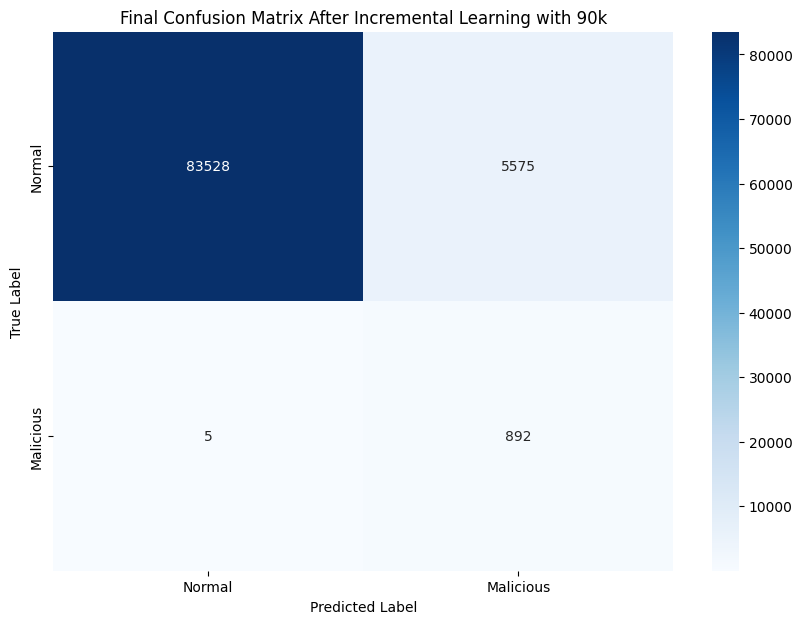

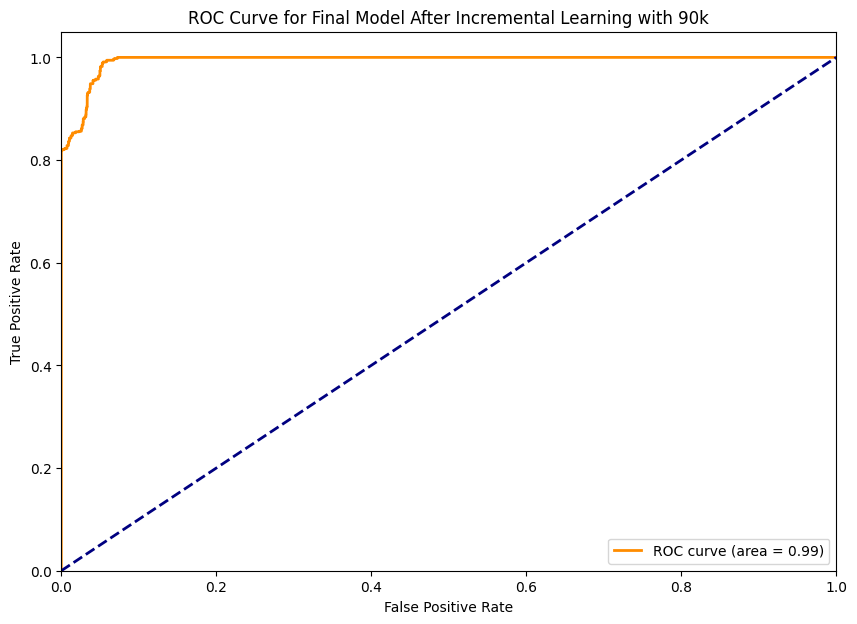

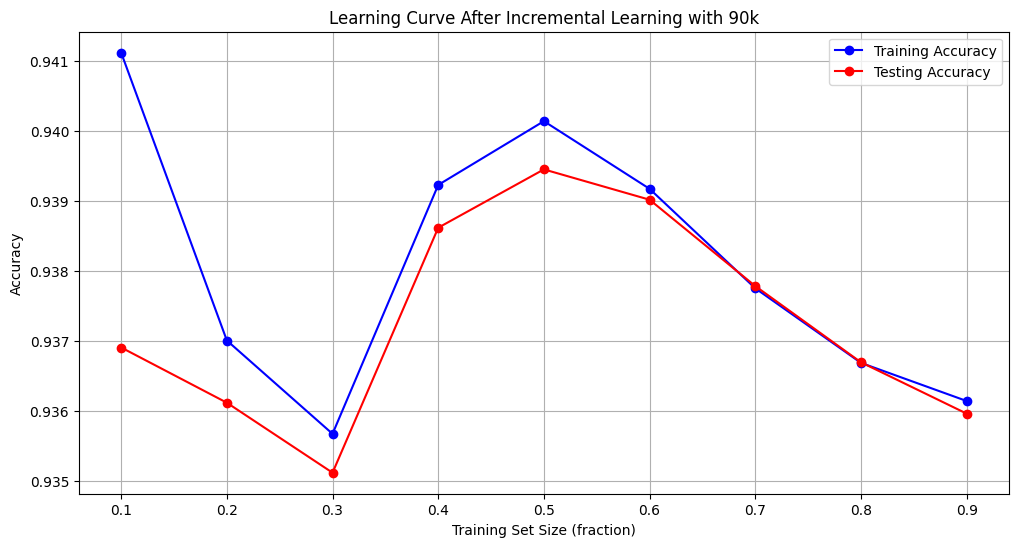

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from joblib import load
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

# Load the 90k dataset
dataset_90k = pd.read_csv(r'C:\Users\Srinivasan Rangasamy\Desktop\dataset generator\new\dataset_90k.csv')  

# Combine relevant textual fields into a single 'text' field
dataset_90k['text'] = dataset_90k['http_method'] + ' ' + dataset_90k['url_path'] + ' ' + dataset_90k['status_code'].astype(str) + ' ' + dataset_90k['user_agent'] + ' ' + dataset_90k['content_type'] + ' ' + dataset_90k['referrer']

# Preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

dataset_90k['text'] = dataset_90k['text'].apply(preprocess_text)

# Load the updated model and vectorizer from the 75k training
model = load('naive_bayes_model_75k.pkl')
vectorizer = load('tfidf_vectorizer_75k.pkl')

# Vectorize the 90k data using the updated vectorizer
X_final_test = vectorizer.transform(dataset_90k['text'].fillna(''))
y_final_test = dataset_90k['label']

# Evaluate the model on the final 90k test set
y_pred_final = model.predict(X_final_test)
accuracy_final = accuracy_score(y_final_test, y_pred_final)
report_final = classification_report(y_final_test, y_pred_final)
conf_matrix_final = confusion_matrix(y_final_test, y_pred_final)

print(f"\nFinal Model Accuracy with 90k: {accuracy_final:.2f}")
print(f"\nFinal Classification Report:\n{report_final}")
print(f"\nFinal Confusion Matrix:\n{conf_matrix_final}")

# Plot Confusion Matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_final, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Malicious'], yticklabels=['Normal', 'Malicious'])
plt.title('Final Confusion Matrix After Incremental Learning with 90k')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC Curve
y_prob_final = model.predict_proba(X_final_test)[:, 1]  # Probabilities of the positive class (malicious)
fpr, tpr, _ = roc_curve(y_final_test, y_prob_final)
roc_auc_final = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_final:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Final Model After Incremental Learning with 90k')
plt.legend(loc="lower right")
plt.show()

# Plot Learning Curve
train_sizes = np.linspace(0.1, 0.9, 9)  # Use a range of train sizes for plotting
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_train_partial, _, y_train_partial, _ = train_test_split(X_final_test, y_final_test, train_size=train_size, random_state=42)
    model.partial_fit(X_train_partial, y_train_partial, classes=[0, 1])
    train_accuracy = accuracy_score(y_train_partial, model.predict(X_train_partial))
    test_accuracy = accuracy_score(y_final_test, model.predict(X_final_test))
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.plot(train_sizes, test_scores, marker='o', linestyle='-', color='r', label='Testing Accuracy')
plt.title('Learning Curve After Incremental Learning with 90k')
plt.xlabel('Training Set Size (fraction)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
